## Loan Prediction Project

Here, in this project we are going to predict the loan default system for an organization using our Deep Learning Classification model

###### About the Dataset
The dataset consists of several historic data factors which are known as features, where the 'loan_status' is the target variable on which based on the feature we are going to predict the loan paying status of an individual.

The dataset consists of 27 features, from which we have to perform data engineering, data analysis, feature elimination and then finally predict using a model and evaluate its accuracy.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset into the dataframe
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [4]:
# Checking the description of the dataset
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
# Checking the types of features and its null presence
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# Determining which feature has the most null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Well, we have only few features with missing values, lets get to them later whether we can eliminate or impute it

#### EDA

Exploratory Data Analysis(EDA) is performed in order to get better insights from a dataset. It gives us a better understandings of distribution of dataset via vizualizations, with which even a non-technical person can easily understand the dataset.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

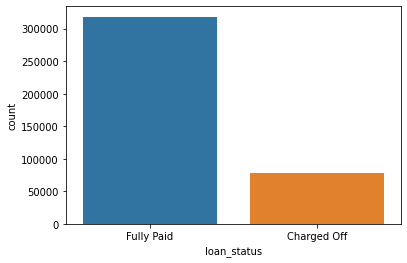

In [7]:
# PLotting the countplot to check the balance of our target variable
sns.countplot(x = 'loan_status', data = df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

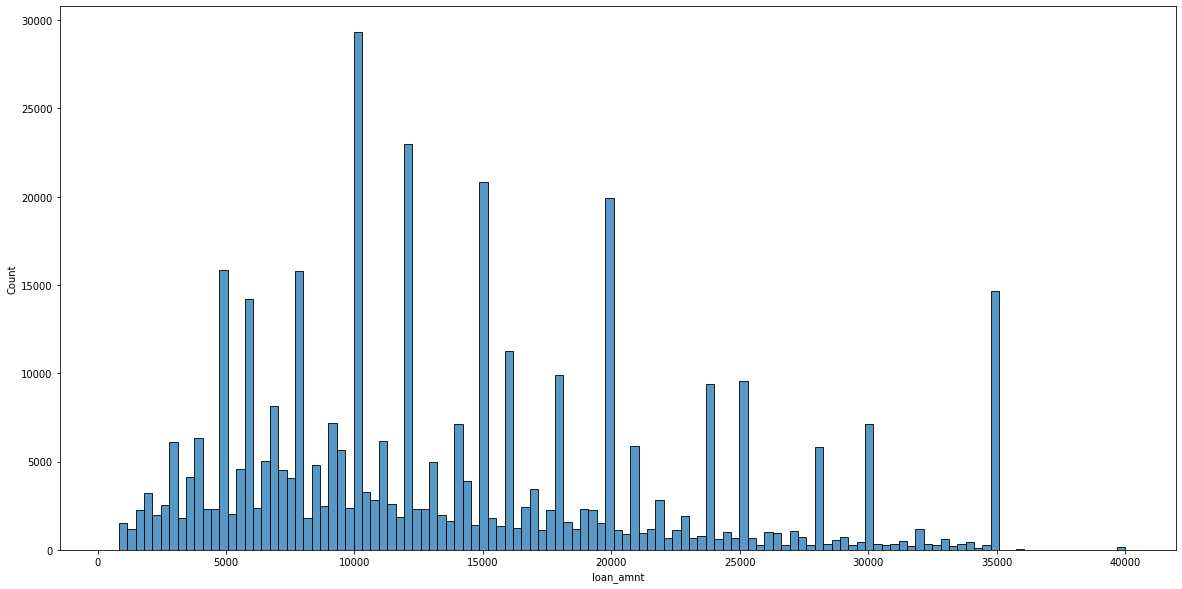

In [8]:
# The distribution of total loan amount taken from the organization
plt.figure(figsize = (20, 10))
sns.histplot(x = 'loan_amnt', data = df)

In [9]:
# Determining the corelation between the features
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

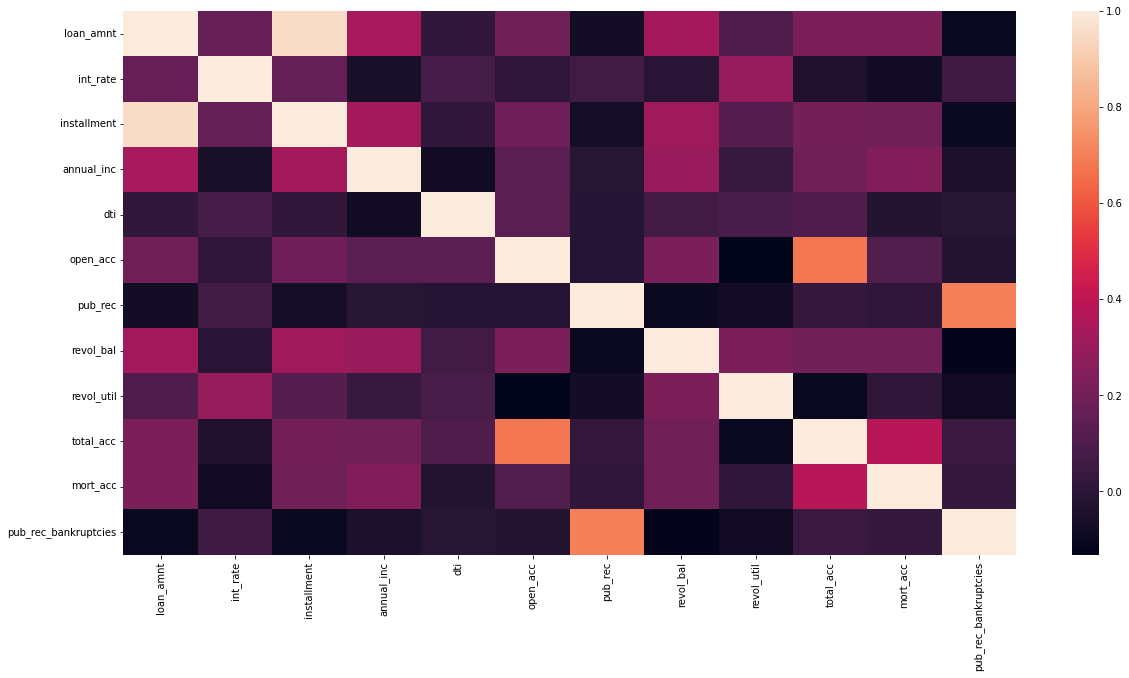

In [10]:
# Visualizing the heatmap for corelation between the variables
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr())

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

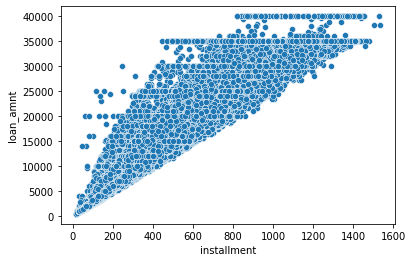

In [11]:
sns.scatterplot(x = 'installment', y = 'loan_amnt', data = df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

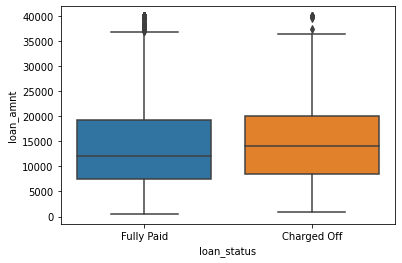

In [12]:
# Visualizing the loan status box plot with respect to loan amount
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

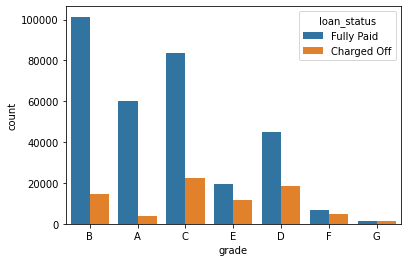

In [16]:
# Visualizing the count of grade values with respect to loan status
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

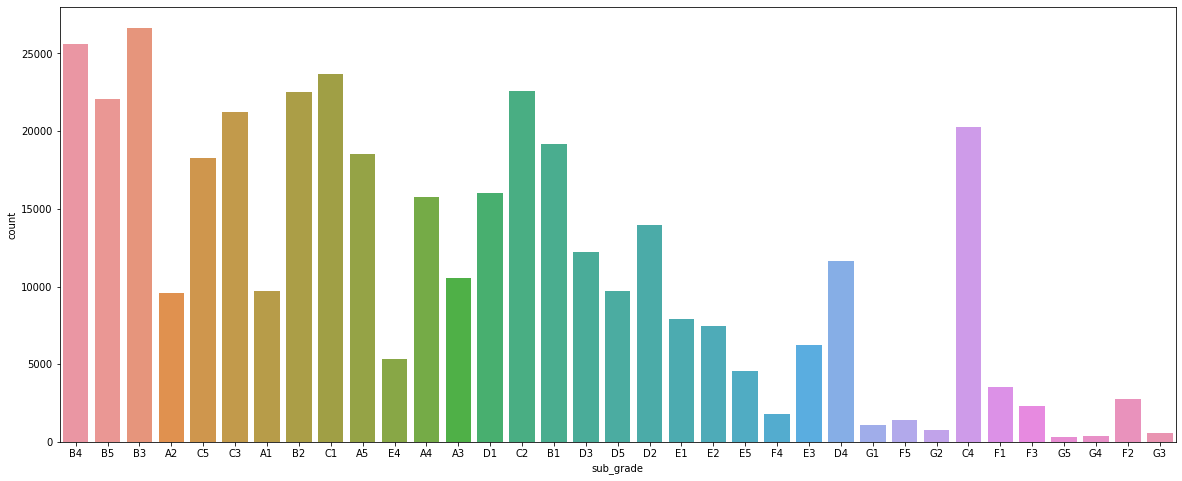

In [17]:
# Visualizing the count of sub grade values with respect to loan status
plt.figure(figsize = (20, 8))
sns.countplot(x = 'sub_grade', data = df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

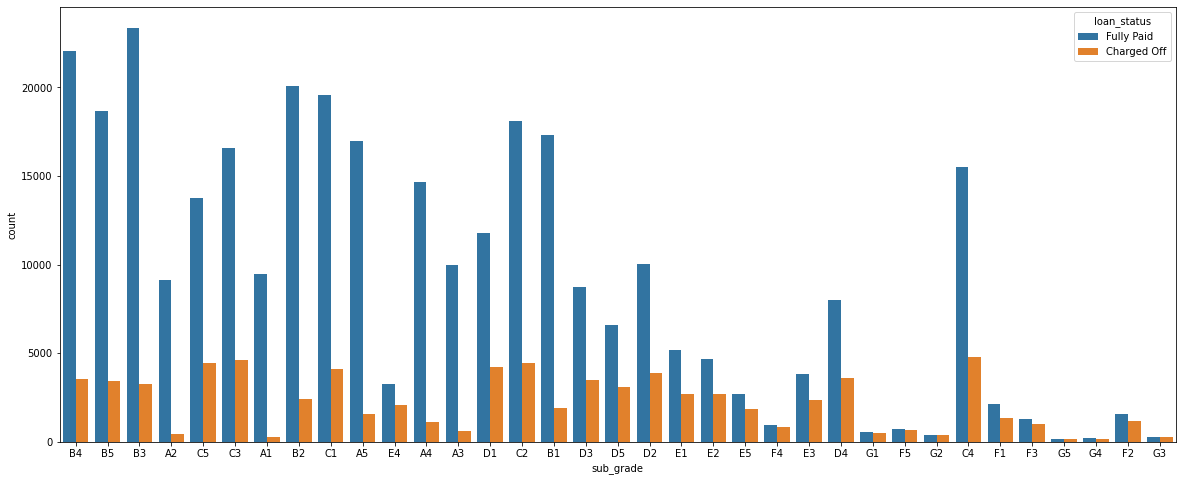

In [18]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'sub_grade', data = df, hue = 'loan_status')

In [19]:
# Using the map function on loan status feature in to conver the object type to categorical type
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [20]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

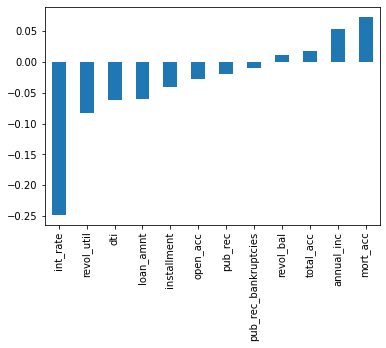

In [21]:
# Visualizing the corelation of features with respect to loan repaid varaible
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

#### Data PreProcessing

In [22]:
# Dealing with null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [23]:
# Percentage distribution of missing null values
(df.isnull().sum()/len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [24]:
# Checking the unique identities of the null values
df['emp_title'].nunique()

173105

In [25]:
# Since there are more than 173105 values we can not map the variables
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [26]:
# So its better to drop the variable as it is not required
df = df.drop('emp_title', axis = 1)

In [27]:
df['emp_length'].nunique()

11

In [28]:
sorted(df['emp_length'].dropna().unique())


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [29]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

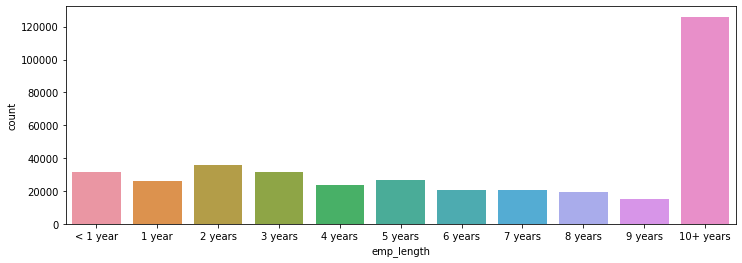

In [30]:
plt.figure(figsize = (12,4))

sns.countplot(x = 'emp_length',data = df, order = emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

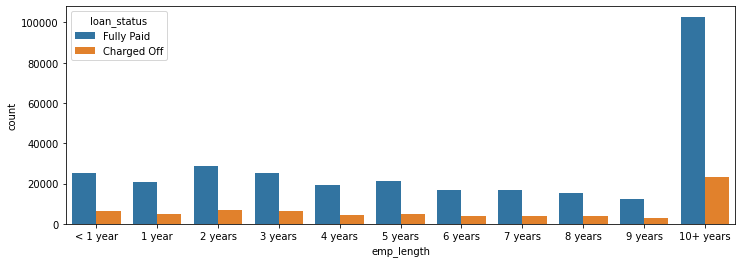

In [31]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'emp_length', data = df,order = emp_length_order, hue = 'loan_status')

In [32]:
df = df.drop('emp_length', axis = 1)

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
# Title feature is also irrelevant so its better we drop it
df = df.drop('title', axis = 1)

In [35]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [36]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [37]:
# Checking the mortage account corelation with respect to other features
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [38]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [39]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [40]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [41]:
# Defining a function to fill the na values
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [42]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [43]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [44]:
# Dropping the na values of the dataframe
df = df.dropna()

In [45]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [46]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [48]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [49]:
df = df.drop('grade', axis = 1)

In [50]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [51]:
df = pd.concat([df.drop('sub_grade', axis = 1), subgrade_dummies],axis = 1)

In [52]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]], drop_first = True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis = 1)
df = pd.concat([df, dummies], axis = 1)

In [53]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [54]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'], drop_first = True)
df = df.drop('home_ownership', axis = 1)
df = pd.concat([df,dummies], axis = 1)

In [55]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [56]:
dummies = pd.get_dummies(df['zip_code'], drop_first = True)
df = df.drop(['zip_code','address'], axis = 1)
df = pd.concat([df,dummies], axis = 1)

In [57]:
df = df.drop('issue_d', axis = 1)

In [58]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line', axis = 1)

In [59]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [60]:
df = df.drop('loan_status', axis = 1)

#### Splitting the data

In [61]:
# Splitting the model into training, validation and testing set
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop('loan_repaid', axis = 1).values
Y = df['loan_repaid'].values

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [64]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [65]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_test = scaler.transform(X_test)

#### Creating the model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm

In [68]:
# Creating the model
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [69]:
# Fitting the model on the training dataset
model.fit(x = X_train, y = Y_train, epochs = 25, batch_size = 256, validation_data = (X_test, Y_test))

Epoch 1/25
1081/1081 [==============================] - 4s 3ms/step - loss: 0.3392 - val_loss: 0.2665
Epoch 2/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2763 - val_loss: 0.2626
Epoch 3/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2706 - val_loss: 0.2614
Epoch 4/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2689 - val_loss: 0.2604
Epoch 5/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2678 - val_loss: 0.2596
Epoch 6/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2666 - val_loss: 0.2601
Epoch 7/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2665 - val_loss: 0.2597
Epoch 8/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2662 - val_loss: 0.2599
Epoch 9/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.2660 - val_loss: 0.2591
Epoch 10/25
1081/1081 [==============================] - 3s 2ms/step - loss: 0.265

In [70]:
# Saving the model on the local disk
from tensorflow.keras.models import load_model
model.save('full_model.h5')

#### Evaluating the performance

In [71]:
# Storing the losses in the dataframe
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

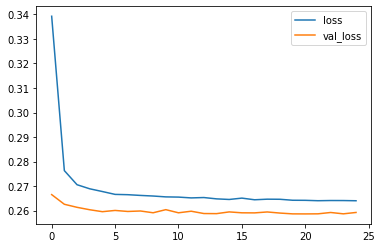

In [72]:
# Plotting the losses
losses.plot()

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [75]:
# Checking the accuracy of the model predicted
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.61     23239
           1       0.88      1.00      0.94     95327

    accuracy                           0.89    118566
   macro avg       0.94      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



In [76]:
# Checking the confusion matrix for type 1 and type 2 error / misclassifications
print(confusion_matrix(Y_test, predictions))

[[10102 13137]
 [   21 95306]]


Here, we can see that the type 1 error is as the 10000 data is misclassified, whereas we are getting 0 misclassifications which means less type 2 error.

Therefore, the accuracy we get 89%

In [77]:
# Creating a random dataset to predict on the trained model
import random
random.seed(123)
random_ind = random.randint(0, len(df))

new_customer = df.drop('loan_repaid', axis = 1).iloc[random_ind]
new_customer

loan_amnt            12000.00
term                    36.00
int_rate                 6.92
installment            370.09
annual_inc          150000.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      1998.00
Name: 27510, Length: 78, dtype: float64

In [78]:
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

array([[1]])

In [79]:
# We have successfully predicted the loan status
df.iloc[random_ind]['loan_repaid']

1.0

##### Conclusion
We have successfully created a Classification Deep Learning algorithm to predict the loan status of a new user.